## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.0, 0.10, 0.25]
neurons1=[512, 256, 128] #num_neurons
neurons2=[512, 256, 128, 64] #num_neurons
neurons3=[256, 512, 256, 128, 64, 32] #num_neurons
NEURONS = [neurons1, neurons2, neurons3]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
i = 0
for item in NEURONS:
    for Drop in Dropout_EXP:
        model = build_mlp(input_shape=x_train.shape[1:], num_neurons=item, drp_ratio=Drop)
        model.summary()
        optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "layer-%s-dropout-%s" % (str(i+3), str(Drop))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-accuracy': train_acc,
                                 'valid-accuracy': valid_acc}
    i+=1

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0   

196/196 [==============================] - 2s 12ms/step - loss: 0.6481 - accuracy: 0.7668 - val_loss: 1.7554 - val_accuracy: 0.5208
Epoch 49/50
196/196 [==============================] - 2s 13ms/step - loss: 0.6289 - accuracy: 0.7755 - val_loss: 1.8176 - val_accuracy: 0.5062
Epoch 50/50
196/196 [==============================] - 3s 14ms/step - loss: 0.6275 - accuracy: 0.7738 - val_loss: 1.8159 - val_accuracy: 0.5144
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None,

196/196 [==============================] - 3s 13ms/step - loss: 1.1847 - accuracy: 0.5740 - val_loss: 1.3344 - val_accuracy: 0.5283
Epoch 46/50
196/196 [==============================] - 3s 13ms/step - loss: 1.1881 - accuracy: 0.5727 - val_loss: 1.3367 - val_accuracy: 0.5269
Epoch 47/50
196/196 [==============================] - 3s 13ms/step - loss: 1.1693 - accuracy: 0.5777 - val_loss: 1.3237 - val_accuracy: 0.5355
Epoch 48/50
196/196 [==============================] - 2s 12ms/step - loss: 1.1699 - accuracy: 0.5799 - val_loss: 1.3611 - val_accuracy: 0.5199
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 1.1777 - accuracy: 0.5770 - val_loss: 1.3484 - val_accuracy: 0.5315
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 1.1639 - accuracy: 0.5782 - val_loss: 1.3415 - val_accuracy: 0.5241
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   

196/196 [==============================] - 2s 12ms/step - loss: 1.4841 - accuracy: 0.4652 - val_loss: 1.4710 - val_accuracy: 0.4806
Epoch 43/50
196/196 [==============================] - 2s 12ms/step - loss: 1.4848 - accuracy: 0.4669 - val_loss: 1.4547 - val_accuracy: 0.4870
Epoch 44/50
196/196 [==============================] - 2s 12ms/step - loss: 1.4730 - accuracy: 0.4711 - val_loss: 1.4654 - val_accuracy: 0.4862
Epoch 45/50
196/196 [==============================] - 2s 12ms/step - loss: 1.4768 - accuracy: 0.4679 - val_loss: 1.4320 - val_accuracy: 0.4904
Epoch 46/50
196/196 [==============================] - 2s 12ms/step - loss: 1.4661 - accuracy: 0.4720 - val_loss: 1.4259 - val_accuracy: 0.4956
Epoch 47/50
196/196 [==============================] - 2s 12ms/step - loss: 1.4688 - accuracy: 0.4733 - val_loss: 1.4329 - val_accuracy: 0.4958
Epoch 48/50
196/196 [==============================] - 2s 12ms/step - loss: 1.4739 - accuracy: 0.4690 - val_loss: 1.4467 - val_accuracy: 0.4866
Epoc

196/196 [==============================] - 2s 12ms/step - loss: 0.8406 - accuracy: 0.6979 - val_loss: 1.4896 - val_accuracy: 0.5302
Epoch 38/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8459 - accuracy: 0.6967 - val_loss: 1.5200 - val_accuracy: 0.5220
Epoch 39/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8170 - accuracy: 0.7079 - val_loss: 1.5385 - val_accuracy: 0.5211
Epoch 40/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8073 - accuracy: 0.7096 - val_loss: 1.5671 - val_accuracy: 0.5213
Epoch 41/50
196/196 [==============================] - 2s 12ms/step - loss: 0.7954 - accuracy: 0.7130 - val_loss: 1.6488 - val_accuracy: 0.5167
Epoch 42/50
196/196 [==============================] - 2s 12ms/step - loss: 0.7853 - accuracy: 0.7160 - val_loss: 1.6747 - val_accuracy: 0.5083
Epoch 43/50
196/196 [==============================] - 2s 13ms/step - loss: 0.7737 - accuracy: 0.7224 - val_loss: 1.6226 - val_accuracy: 0.5226
Epoc

196/196 [==============================] - 2s 12ms/step - loss: 1.2904 - accuracy: 0.5375 - val_loss: 1.3451 - val_accuracy: 0.5259
Epoch 33/50
196/196 [==============================] - 2s 12ms/step - loss: 1.2802 - accuracy: 0.5405 - val_loss: 1.3588 - val_accuracy: 0.5180
Epoch 34/50
196/196 [==============================] - 2s 13ms/step - loss: 1.2798 - accuracy: 0.5403 - val_loss: 1.3542 - val_accuracy: 0.5205
Epoch 35/50
196/196 [==============================] - 2s 12ms/step - loss: 1.2785 - accuracy: 0.5403 - val_loss: 1.3438 - val_accuracy: 0.5259
Epoch 36/50
196/196 [==============================] - 2s 12ms/step - loss: 1.2675 - accuracy: 0.5455 - val_loss: 1.3517 - val_accuracy: 0.5213
Epoch 37/50
196/196 [==============================] - 2s 12ms/step - loss: 1.2632 - accuracy: 0.5452 - val_loss: 1.3631 - val_accuracy: 0.5178
Epoch 38/50
196/196 [==============================] - 2s 12ms/step - loss: 1.2591 - accuracy: 0.5476 - val_loss: 1.3454 - val_accuracy: 0.5244
Epoc

196/196 [==============================] - 2s 12ms/step - loss: 1.6130 - accuracy: 0.4225 - val_loss: 1.5480 - val_accuracy: 0.4484
Epoch 28/50
196/196 [==============================] - 2s 12ms/step - loss: 1.6082 - accuracy: 0.4240 - val_loss: 1.5584 - val_accuracy: 0.4492
Epoch 29/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5993 - accuracy: 0.4257 - val_loss: 1.5173 - val_accuracy: 0.4708
Epoch 30/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5990 - accuracy: 0.4265 - val_loss: 1.5505 - val_accuracy: 0.4549
Epoch 31/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5906 - accuracy: 0.4290 - val_loss: 1.5415 - val_accuracy: 0.4530
Epoch 32/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5887 - accuracy: 0.4305 - val_loss: 1.5380 - val_accuracy: 0.4543
Epoch 33/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5872 - accuracy: 0.4291 - val_loss: 1.5367 - val_accuracy: 0.4618
Epoc

Epoch 19/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0992 - accuracy: 0.6058 - val_loss: 1.3995 - val_accuracy: 0.5144
Epoch 20/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0749 - accuracy: 0.6163 - val_loss: 1.4213 - val_accuracy: 0.5120
Epoch 21/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0446 - accuracy: 0.6237 - val_loss: 1.4198 - val_accuracy: 0.5186
Epoch 22/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0174 - accuracy: 0.6349 - val_loss: 1.4263 - val_accuracy: 0.5155
Epoch 23/50
196/196 [==============================] - 2s 10ms/step - loss: 0.9772 - accuracy: 0.6491 - val_loss: 1.4204 - val_accuracy: 0.5216
Epoch 24/50
196/196 [==============================] - 2s 10ms/step - loss: 0.9547 - accuracy: 0.6547 - val_loss: 1.4334 - val_accuracy: 0.5260
Epoch 25/50
196/196 [==============================] - 2s 10ms/step - loss: 0.9266 - accuracy: 0.6653 - val_loss: 1.4965 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 1.5922 - accuracy: 0.4335 - val_loss: 1.5166 - val_accuracy: 0.4637
Epoch 11/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5760 - accuracy: 0.4400 - val_loss: 1.5101 - val_accuracy: 0.4583
Epoch 12/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5553 - accuracy: 0.4465 - val_loss: 1.5193 - val_accuracy: 0.4463
Epoch 13/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5459 - accuracy: 0.4488 - val_loss: 1.4786 - val_accuracy: 0.4710
Epoch 14/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5326 - accuracy: 0.4556 - val_loss: 1.5126 - val_accuracy: 0.4599
Epoch 15/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5153 - accuracy: 0.4614 - val_loss: 1.5006 - val_accuracy: 0.4665
Epoch 16/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5082 - accuracy: 0.4627 - val_loss: 1.4851 - val_accuracy: 0.4807
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 2.2262 - accuracy: 0.1420 - val_loss: 2.0686 - val_accuracy: 0.1902
Epoch 2/50
196/196 [==============================] - 2s 10ms/step - loss: 2.0869 - accuracy: 0.1883 - val_loss: 1.9895 - val_accuracy: 0.2533
Epoch 3/50
196/196 [==============================] - 2s 10ms/step - loss: 2.0376 - accuracy: 0.2166 - val_loss: 1.9552 - val_accuracy: 0.2531
Epoch 4/50
196/196 [==============================] - 2s 10ms/step - loss: 2.0036 - accuracy: 0.2295 - val_loss: 1.9100 - val_accuracy: 0.2721
Epoch 5/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9993 - accuracy: 0.2353 - val_loss: 1.9398 - val_accuracy: 0.2780
Epoch 6/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9792 - accuracy: 0.2451 - val_loss: 1.8952 - val_accuracy: 0.2848
Epoch 7/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9590 - accuracy: 0.2532 - val_loss: 1.9176 - val_accuracy: 0.2811
Epoch 8/50

In [ ]:
results.keys()

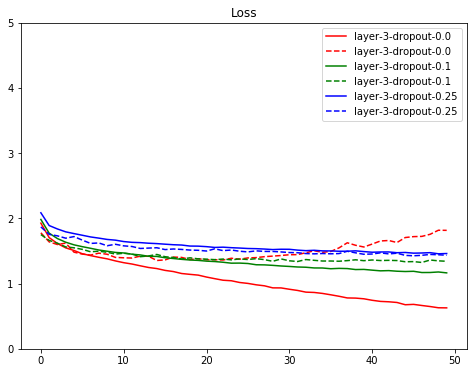

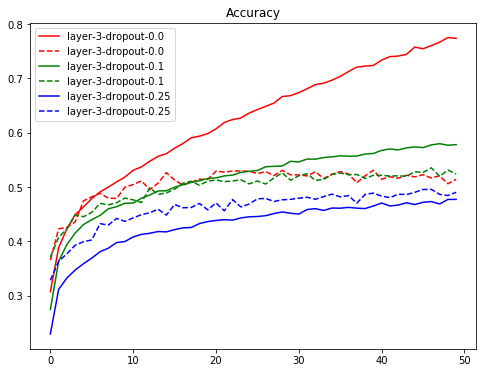

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k", "r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [3,4,5,6,7,8,9,10,11]: continue
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [3,4,5,6,7,8,9,10,11]: continue
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

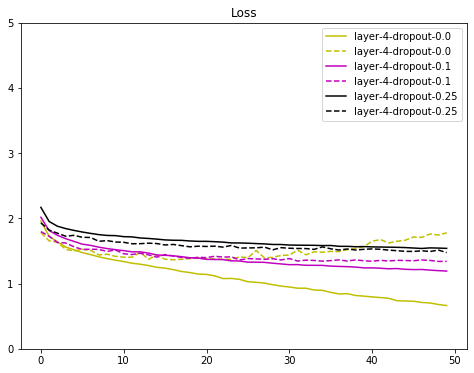

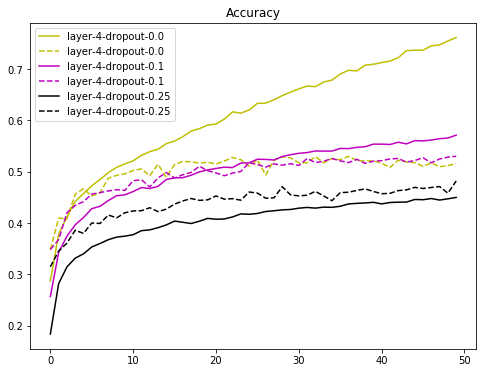

In [11]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [0,1,2,6,7,8,9,10,11]: continue
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [0,1,2,6,7,8,9,10,11]: continue
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

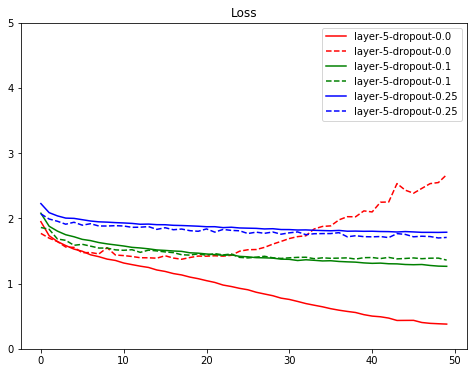

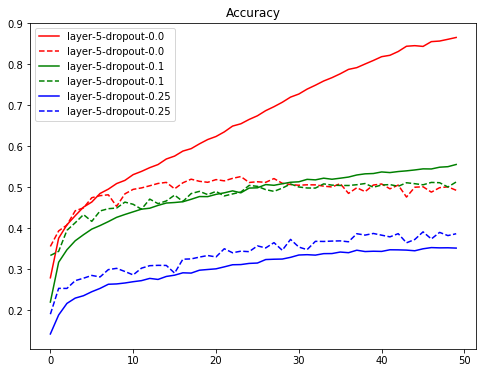

In [12]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [0,1,2,3,4,5,9,10,11]: continue
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [0,1,2,3,4,5,9,10,11]: continue
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

drop 些許情形下，過擬合情形可以降低，而由此資料集進行比較並非說越多層狀況就一定越好。主要是在特定情形下可以使得訓練與測試成果較為一致。